In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ssi import SSI
from ssi.cmap import CondColormap
from ssi.geol import EUROPA
from ssi.photometry import fit
from ssi import LORRI

## Check image alignement

In [2]:
#img = SSI('C2065229.pho.cub', align=True) # issue with geometry, can't even see it
#img = SSI('C2065024.pho.cub')#, 
#img = SSI('C2065032.pho.cub', offset_l=-1, offset_s=0)C2065044.pho.cub
#img = SSI('C2065044.pho.cub', offset_l=5, offset_s=0)#C2065052.pho.cub
#img = SSI('C2065052.pho.cub', offset_l=5, offset_s=5)
#img = SSI('C2059319.pho.cub', align=True)#, offset_l=5, offset_s=5) 
#img = SSI('C2065145.pho.cub', offset_s=7, offset_l=15) 
#img = SSI('C2065145.pho.cub', offset_s=7, offset_l=15) 
#img = SSI('C0401727726R_cal.pho.cub', offset_s=35, offset_l=-20)
#img = SSI('C0413743200R_cal.pho.cub', offset_s=88)#, offset_l=-20)
#img = SSI('C0639063413R_cal.pho.cub', align= True)# offset_s=35, offset_l=-20)
#img = SSI('C0360063913R_cal.pho.cub')#, align= True)

#img = SSI('C0360063913R_cal.pho.cub', align = True)

#img = SSI('5126r_cal.pho.cub', align= True)
img = SSI('C0374649026R.pho.cub')#, align= True)
#img = SSI('C2060513.pho.cub', align=True)#offset_l = 8, offset_s=10)
#img = SSI('C2061215.pho.cub', align=True) #has issues
#img = SSI('C2065213.pho.cub', offset_s=0, offset_l=15) 
#img = SSI('C2065221.pho.cub', offset_s=0, offset_l=15) 
#img = LORRI('lor_0034931999_0x630_sci.pho.cub', offset_l=1)
#img = LORRI('lor_0034735439_0x630_sci.pho.cub', offset_l=1)
#img = LORRI('lor_0034866662_0x630_sci.pho.cub', offset_l=1)
#img = LORRI('lor_0034823099_0x630_sci.pho.cub', align=True)
#img = LORRI('lor_0034930319_0x630_sci.pho.cub', offset_l=-5)
#img = LORRI('lor_0034975919_0x630_sci.pho.cub', offset_s=-5, offset_l=-15)
#img = LORRI('lor_0035025959_0x630_sci.pho.cub', offset_s=-15, offset_l=-15)

#img = SSI('C0349875100R.pho.cub', align=True)
#img = SSI('C0349875113R.pho.cub', align=True)
#img = SSI('C0368639400R.pho.cub', align=True) 
#img = SSI('C0374649000R.pho.cub', align=True) 
#img = SSI('C0374649013R.pho.cub', align=True) 
#img = SSI('C0374649026R.pho.cub', align=True) 
#img = SSI('C0374685100R.pho.cub', align=True)
#img = SSI('C0374685439R.pho.cub', align=True)
#img = SSI('C0383694600R.pho.cub', align=True) 
#img = SSI('C0383718600R.pho.cub', align=True) #didn't use
#img = SSI('C0420619200R.pho.cub', align=True) # didn't use
#img = SSI('C0426273826R.pho.cub', align=True) #didn't use
#img = SSI('C0440948639R.pho.cub', align=True)  # didn't use
#img = SSI('C0440953627R.pho.cub', align=True)   #didn't use
#img = SSI('C0440955165R.pho.cub', align=True) 75 phase
#img = SSI('C0449974226R.pho.cub', align=True)     
#img = SSI('C2065219.pho.cub', align=True)
#img = SSI('C2065211.pho.cub', align=True)
#img = SSI('C2065022.pho.cub', align=True)
img

<SSI> Cube: C0374649026R.pho
 - Size: (800, 800)
 - Start time: 1996-12-19 00:34:51.784000
 - Filter name: CLEAR
 - Exposure: 0.0125 seconds
 - Main target: EUROPA
 - Data alignment: False

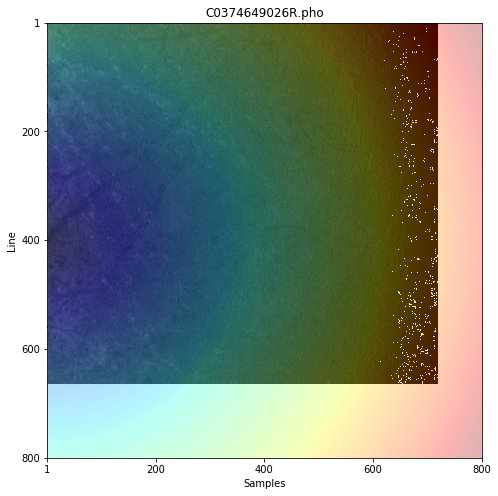

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent, vmin=0, vmax=1)
ax.imshow(img.emi, cmap='jet', extent=img.extent, alpha=.3)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)
ax.set_title(img);

plt.savefig('GalileoCubeAligned.png')

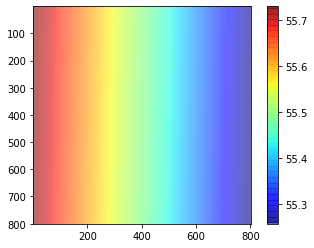

In [4]:
plt.imshow(img.phase, cmap='jet', extent=img.extent, alpha=0.6)
plt.colorbar();

The auto-alignment failed (fitted on the right terminator instead of the left limb).

## Offset image to align the navigation data

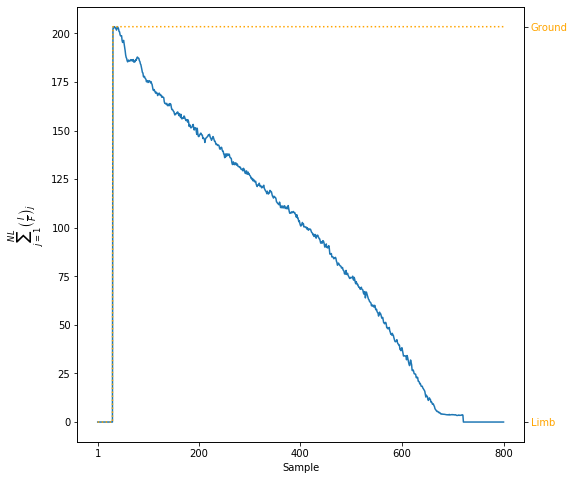

In [5]:
img.alignment(offset_l=-20, offset_s=30)

fig, ax0 = plt.subplots(1, 1, figsize=(8, 8))
ax1 = ax0.twinx()

ax0.plot(img.sample[0], np.nansum(img.data, axis=0))
ax1.plot(img.sample[0], np.nansum(img.ground, axis=0) > 0, color='orange', ls=':')

ax0.set_xticks(img.sticks)
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['Limb', 'Ground'], color='orange')

ax0.set_xlabel('Sample')
ax0.set_ylabel(r'$\sum_{j=1}^{NL} \left(\frac{I}{F}\right)_j$', fontsize=12);

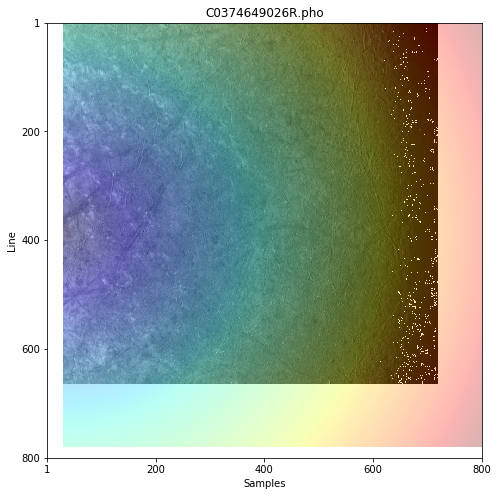

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(img.emi, cmap='jet', extent=img.extent, alpha=.3)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)
ax.set_title(img);

## Extract ground pixel with illumination conditions

In [7]:
cond = img.ground                                         \
     & ~np.isnan(img.data)                                \
     & np.greater(img.inc, .1, where=img.ground)          \
     & np.less(img.inc, 85, where=img.ground)             \
     & np.greater(img.emi, .1, where=img.ground)          \
     & np.less(img.emi, 85, where=img.ground)             \
     & np.less(img.data, .99, where=~np.isnan(img.data))  \
     & np.greater(img.data, .1, where=~np.isnan(img.data))

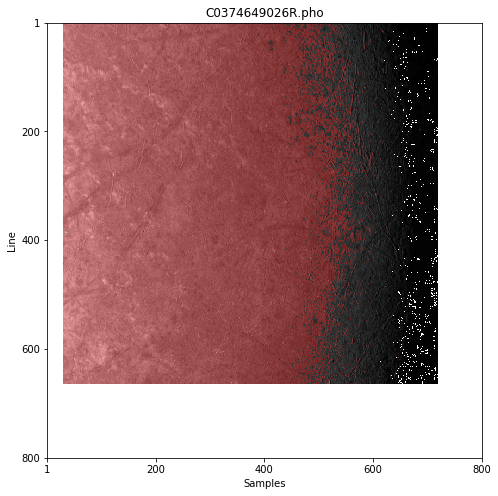

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(cond, cmap=CondColormap('red'), extent=img.extent, alpha=.3)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)
ax.set_title(img);

In [9]:
(B0, k, dB0, dk), (xdata_m, ydata_m), (xfit_m, yfit_m, fit_err_m) = \
    fit(img, cond, model='minnaert', err=True, debug=True)

(A, f_alpha, dA, df_alpha), (xdata_h, ydata_h), (xfit_h, yfit_h, fit_err_h) = \
    fit(img, cond, model='hapke', err=True, debug=True)

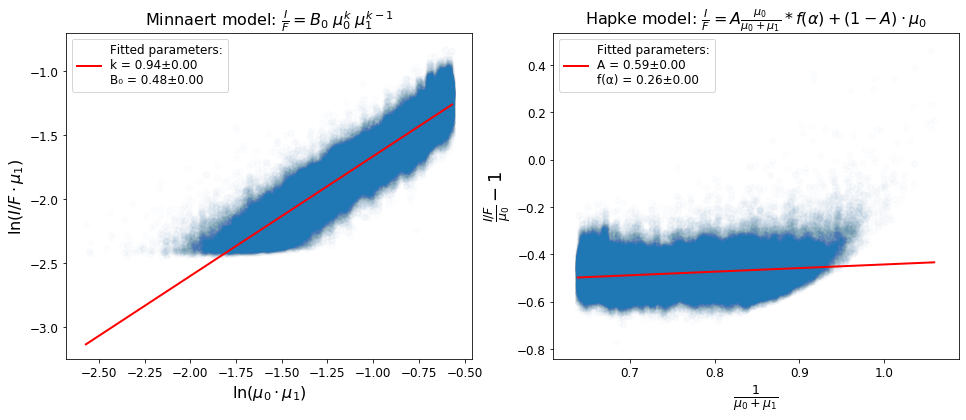

In [10]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

ax0.scatter(xdata_m, ydata_m, alpha=.01)
ax0.plot(xfit_m, yfit_m, 'r-', lw=2, label=f'Fitted parameters:\nk = {k:.2f}±{dk:.2f}\nB₀ = {B0:.2f}±{dB0:.2f}')
ax0.set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize = 16)
ax0.set_ylabel(r'$\ln(I/F \cdot \mu_1)$', fontsize = 16)
ax0.set_title(r'Minnaert model: $\frac{I}{F} = B_0 \; \mu_0^k \; \mu_1^{k-1}$', fontsize = 16)
ax0.legend(fontsize = 12)
ax0.xaxis.set_tick_params(labelsize=12)
ax0.yaxis.set_tick_params(labelsize=12)


ax1.scatter(xdata_h, ydata_h, alpha=.01)
ax1.plot(xfit_h, yfit_h, 'r-', lw=2, label=f'Fitted parameters:\nA = {A:.2f}±{dA:.2f}\nf(α) = {f_alpha:.2f}±{df_alpha:.2f}')
ax1.set_xlabel(r'$\frac{1}{\mu_0 + \mu_1}$', fontsize = 18)
ax1.set_ylabel(r'$\frac{I/F}{\mu_0} - 1$', fontsize = 18)
ax1.set_title(r'Hapke model: $\frac{I}{F} = A \frac{\mu_0}{\mu_0 + \mu_1} * f(\alpha) + (1 - A) \cdot \mu_0$', fontsize = 16)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

ax1.legend(fontsize = 12);

In [11]:
lim_m = ax0.get_xlim(), ax0.get_ylim()
lim_h = ax1.get_xlim(), ax1.get_ylim()

## Decompose by geological units

In [111]:
geol_units = EUROPA(img)

units = [
  'Ridged plains',
  'Bands',
   'Crater',
   'Continuous crater ejecta',
   'Discontinuous crater ejecta',
  'Low albedo chaos',
   'Mottled albedo chaos',
 'High albedo chaos',
  'Knobby albedo chaos',
 ]

In [112]:
def img_unit(ax, img, cond, unit):
    """Plot unit mask on axis based on the unit name."""
    color = EUROPA.color(unit)
    ax.imshow(img.data, cmap='gray', extent=img.extent)
    ax.imshow(cond, cmap=CondColormap(color), extent=img.extent)
    
def data_unit(ax, img, cond, unit, model, lim):
    """Plot data based on the unit name with the relevant model axis."""
    color = EUROPA.color(unit)
    (p1, p2, dp1, dp2), (xx, yy), (x, y, _) = fit(img, cond, model=model, err=True, debug=True)
    _p1, _p2 = ('B₀', 'k') if model == 'Minnaert' else ('A', 'f(α)')

    ax.scatter(xx, yy, c=[color], alpha=.05)
    ax.scatter([], [], c=[color], label=f'{unit}:\n{_p1} = {p1:.2f}±{dp1:.2f}\n{_p2} = {p2:.2f}±{dp2:.2f}')  # Add empty data for the legend
    ax.plot(x, y, '-', lw=2, color='red')
    
    ax.set_xlim(*lim[0])
    ax.set_ylim(*lim[1])
    ax.legend()
    
def display_unit(axis, img, cond, unit):
    """Display unit fit ouptut."""
    cond_unit = cond & (geol_units == unit)
    img_unit(axis[0], img, cond_unit, unit)
    data_unit(axis[1], img, cond_unit, unit, 'Minnaert', lim_m)
    data_unit(axis[2], img, cond_unit, unit, 'Hapke', lim_h)

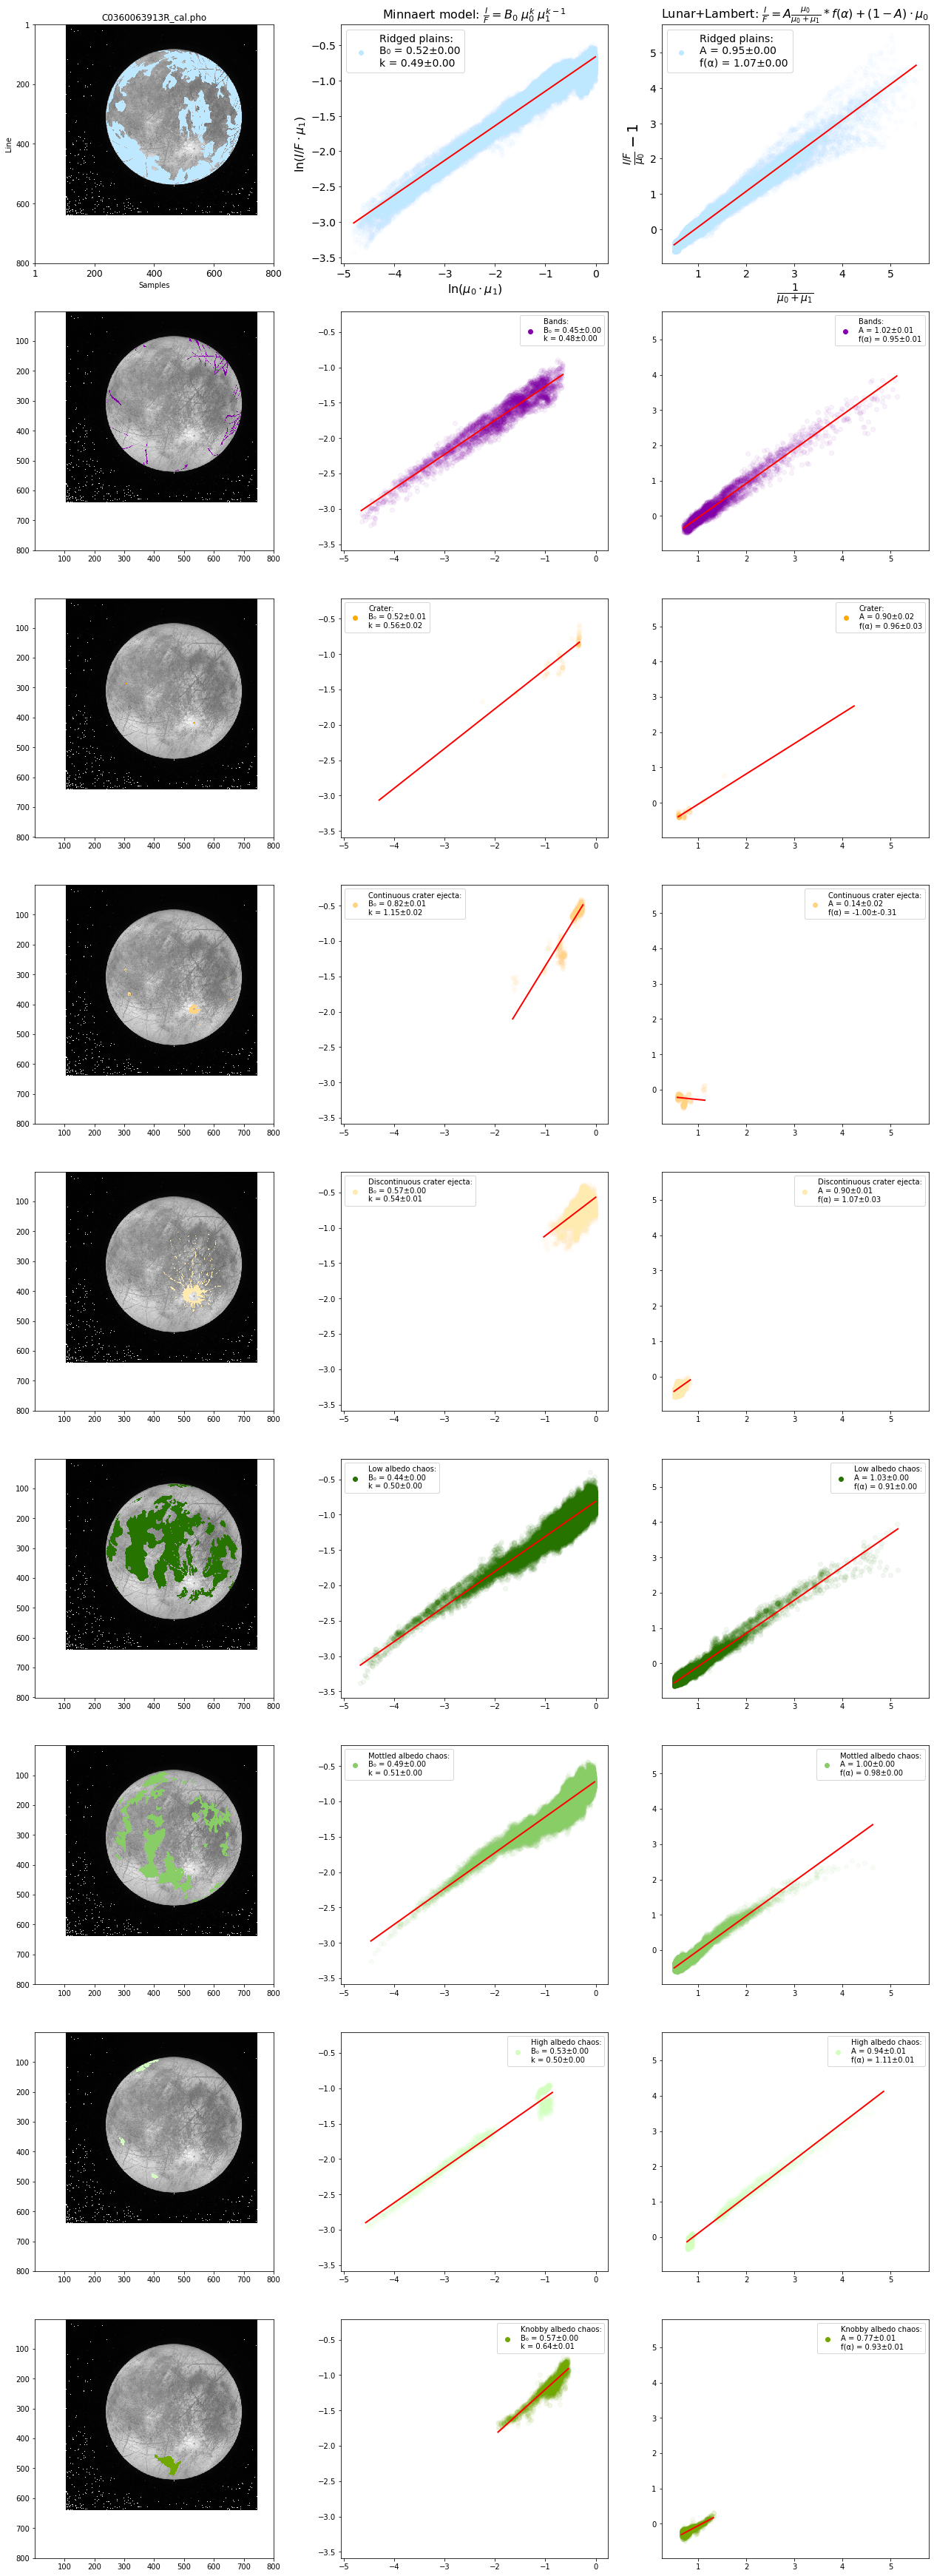

In [113]:
fig, axis = plt.subplots(len(units), 3, figsize=(22, 7 * len(units)))

for i, unit in enumerate(units):
    display_unit(axis[i], img, cond, unit)

axis[0, 0].set_xlabel('Samples')
axis[0, 0].set_ylabel('Line')
axis[0, 0].set_xticks(img.sticks)
axis[0, 0].set_yticks(img.lticks)
axis[0, 0].set_title(img)
axis[0, 0].xaxis.set_tick_params(labelsize=12)

axis[0, 1].set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$', fontsize = 16)
axis[0, 1].set_ylabel(r'$\ln(I/F \cdot \mu_1)$', fontsize = 16)
axis[0, 1].set_title(r'Minnaert model: $\frac{I}{F} = B_0 \; \mu_0^k \; \mu_1^{k-1}$', fontsize = 16)
axis[0, 1].xaxis.set_tick_params(labelsize=14)
axis[0, 1].yaxis.set_tick_params(labelsize=14)
axis[0, 1].legend(fontsize = 14)

axis[0, 2].set_xlabel(r'$\frac{1}{\mu_0 + \mu_1}$', fontsize = 20)
axis[0, 2].set_ylabel(r'$\frac{I/F}{\mu_0} - 1$', fontsize = 20)
axis[0, 2].set_title(r'Lunar+Lambert: $\frac{I}{F} = A \frac{\mu_0}{\mu_0 + \mu_1} * f(\alpha) + (1 - A) \cdot \mu_0$', fontsize = 16)
axis[0, 2].xaxis.set_tick_params(labelsize=14)
axis[0, 2].yaxis.set_tick_params(labelsize=14)
axis[0, 2].legend(fontsize = 14)
#plt.savefig(f'Fits_units-{img}.png', bbox_inches='tight', transparent=True);

In [97]:
def get_parameters(img, cond, units, verbose=True, save=True):
    """Get the photometric parameters for a list of units."""
    res = {}
    for unit in units:
        cond_unit = cond & (geol_units == unit)
        if cond_unit.any():
            res[unit] = {}
            try:
                res[unit]['B0'], res[unit]['k'], res[unit]['dB0'], res[unit]['dk'] = \
                    fit(img, cond_unit, model='minnaert', err=True)
            except:
                res[unit]['B0'], res[unit]['k'], res[unit]['dB0'], res[unit]['dk'] = \
                    np.nan, np.nan, np.nan, np.nan

            try:
                res[unit]['A'], res[unit]['f_alpha'], res[unit]['dA'], res[unit]['df_alpha'] = \
                    fit(img, cond_unit, model='hapke', err=True)
            except:
                res[unit]['A'], res[unit]['f_alpha'], res[unit]['dA'], res[unit]['df_alpha'] = \
                    np.nan, np.nan, np.nan, np.nan

    if verbose:
        print(f'Image ID   : {img}')
        print(f'Phase angle: {np.nanmean(img.phase):.0f}°')
        print(f'Filter     : {img.filter_name}')
        print('')
        print('| Unit                        |   B0  |   k   |   A   |  f(alpha) |')
        print('|-----------------------------|-------|-------|-------|-------|')

        for unit, values in res.items():
            print(f'| {unit:27s} | {values["B0"]:5.2f} | {values["k"]:5.2f} | {values["A"]:5.2f} | {values["f_alpha"]:5.2f} |')
    
    if save:
        with open(f'{img}.csv', 'w') as f:
            f.write(f'# img_id, {img}\n')
            f.write(f'# offset_s, {img.offset_s}\n')
            f.write(f'# offset_l, {img.offset_l}\n')
            f.write(f'# filter, {img.filter_name}\n')
            f.write(f'# phase, {np.nanmean(img.phase):.0f}\n')
            f.write(f'# unit, B0, dB0, k, dk, A, dA, f_alpha, df_alpha\n')
            for unit, values in res.items():
                f.write(f'{unit}, ')
                f.write(f'{values["B0"]:.4f}, ')
                f.write(f'{values["dB0"]:.4f}, ')
                f.write(f'{values["k"]:.4f}, ')
                f.write(f'{values["dk"]:.4f}, ')
                f.write(f'{values["A"]:.4f}, ')
                f.write(f'{values["dA"]:.4f}, ')
                f.write(f'{values["f_alpha"]:.4f}, ')
                f.write(f'{values["df_alpha"]:.4f}\n')
    
    return res
              
get_parameters(img, cond, units);

Image ID   : C0360063913R_cal.pho
Phase angle: 2°
Filter     : VIOLET

| Unit                        |   B0  |   k   |   A   |  f(alpha) |
|-----------------------------|-------|-------|-------|-------|
| Crater                      |  0.52 |  0.56 |  0.90 |  0.96 |


Remove the crater and ejecta data from the units results list:

In [ ]:
res = get_parameters(img, cond, [
   'Ridged plains',
    'Bands',
#    'Low albedo chaos',
    'Mottled albedo chaos',
#  'Knobby albedo chaos',
#   'High albedo chaos',
#    'Crater',
#'Continuous crater ejecta',
# 'Discontinuous crater ejecta',
])

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, unit in enumerate(res.keys()):
    color = EUROPA.color(unit)
    ax[0].errorbar(i, res[unit]['B0'], yerr=res[unit]['dB0'], fmt='o', color=color)
    ax[1].errorbar(i, res[unit]['k'], yerr=res[unit]['dk'], fmt='o', color=color)
    ax[2].errorbar(i, res[unit]['A'], yerr=res[unit]['dA'], fmt='o', color=color)
    ax[3].errorbar(i, res[unit]['f_alpha'], yerr=res[unit]['df_alpha'], fmt='o', color=color)
    
for i, title in enumerate(['B₀', 'k', 'A', 'f(α)']):
    ax[i].set_title(title)
    ax[i].set_xticks(np.arange(len(res)))
    ax[i].set_xticklabels(res.keys(), rotation=45, ha='right')
    
plt.suptitle(f'{img} - Phase: {np.nanmean(img.phase):.0f}°')

plt.savefig(f'Fits_values-{img}.png', bbox_inches='tight', transparent=True);

## Re-apply on a new image

In [40]:
#img = SSI('C2060513.pho.cub', offset_l = 9)#align=True)
img = SSI('C2065016.pho.cub', offset_l=8, offset_s=10)# offset_s=2, offset_l=10) C2060513 C2061215
#img = LORRI('lor_0034930319_0x630_sci.pho.cub', offset_l=-10, offset_s=-20)
img

<SSI> Cube: C2065016.pho
 - Size: (800, 800)
 - Start time: 1979-07-09 15:07:10.980000
 - Filter name: ORANGE
 - Exposure: 0.24 seconds
 - Main target: Europa
 - Data alignment: (10, 8)

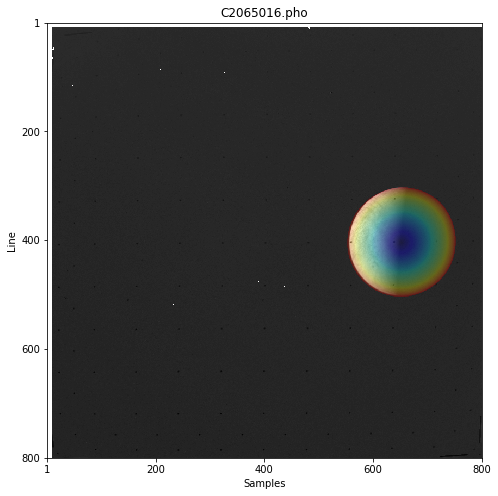

In [138]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(img.emi, cmap='jet', extent=img.extent, alpha=.3)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)
ax.set_title(img);

The alignment is seems to be good but need to be improve manually:

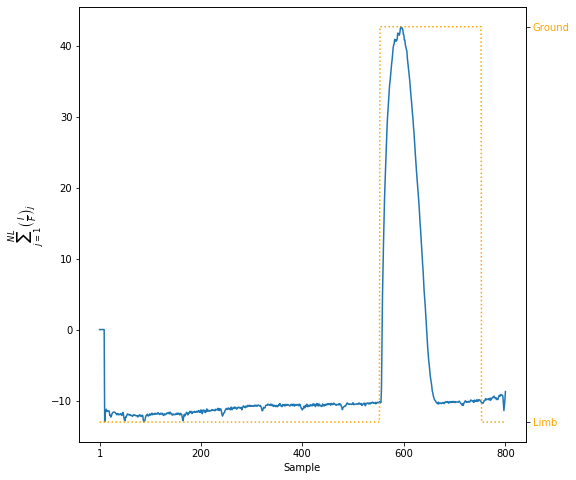

In [139]:
img.alignment(offset_l=8, offset_s=10)

fig, ax0 = plt.subplots(1, 1, figsize=(8, 8))
ax1 = ax0.twinx()

ax0.plot(img.sample[0], np.nansum(img.data, axis=0))
ax1.plot(img.sample[0], np.nansum(img.ground, axis=0) > 0, color='orange', ls=':')

ax0.set_xticks(img.sticks)
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['Limb', 'Ground'], color='orange')

ax0.set_xlabel('Sample')
ax0.set_ylabel(r'$\sum_{j=1}^{NL} \left(\frac{I}{F}\right)_j$', fontsize=12);

In [140]:
cond = img.ground                                         \
     & ~np.isnan(img.data)                                \
     & np.greater(img.inc, .1, where=img.ground)          \
     & np.less(img.inc, 85, where=img.ground)             \
     & np.greater(img.emi, .1, where=img.ground)          \
     & np.less(img.emi, 85, where=img.ground)             \
     & np.less(img.data, .99, where=~np.isnan(img.data))  \
     & np.greater(img.data, .2, where=~np.isnan(img.data))

geol_units = EUROPA(img)

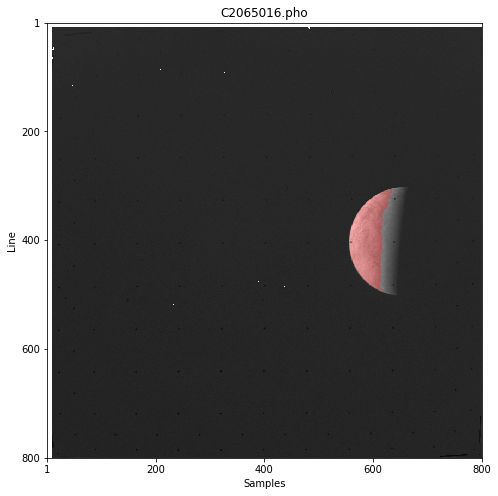

In [141]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.imshow(img.data, cmap='gray', extent=img.extent)
ax.imshow(cond, cmap=CondColormap('red'), extent=img.extent, alpha=.3)

ax.set_xlabel('Samples')
ax.set_ylabel('Line')
ax.set_xticks(img.sticks)
ax.set_yticks(img.lticks)
ax.set_title(img);

TypeError: expected non-empty vector for x

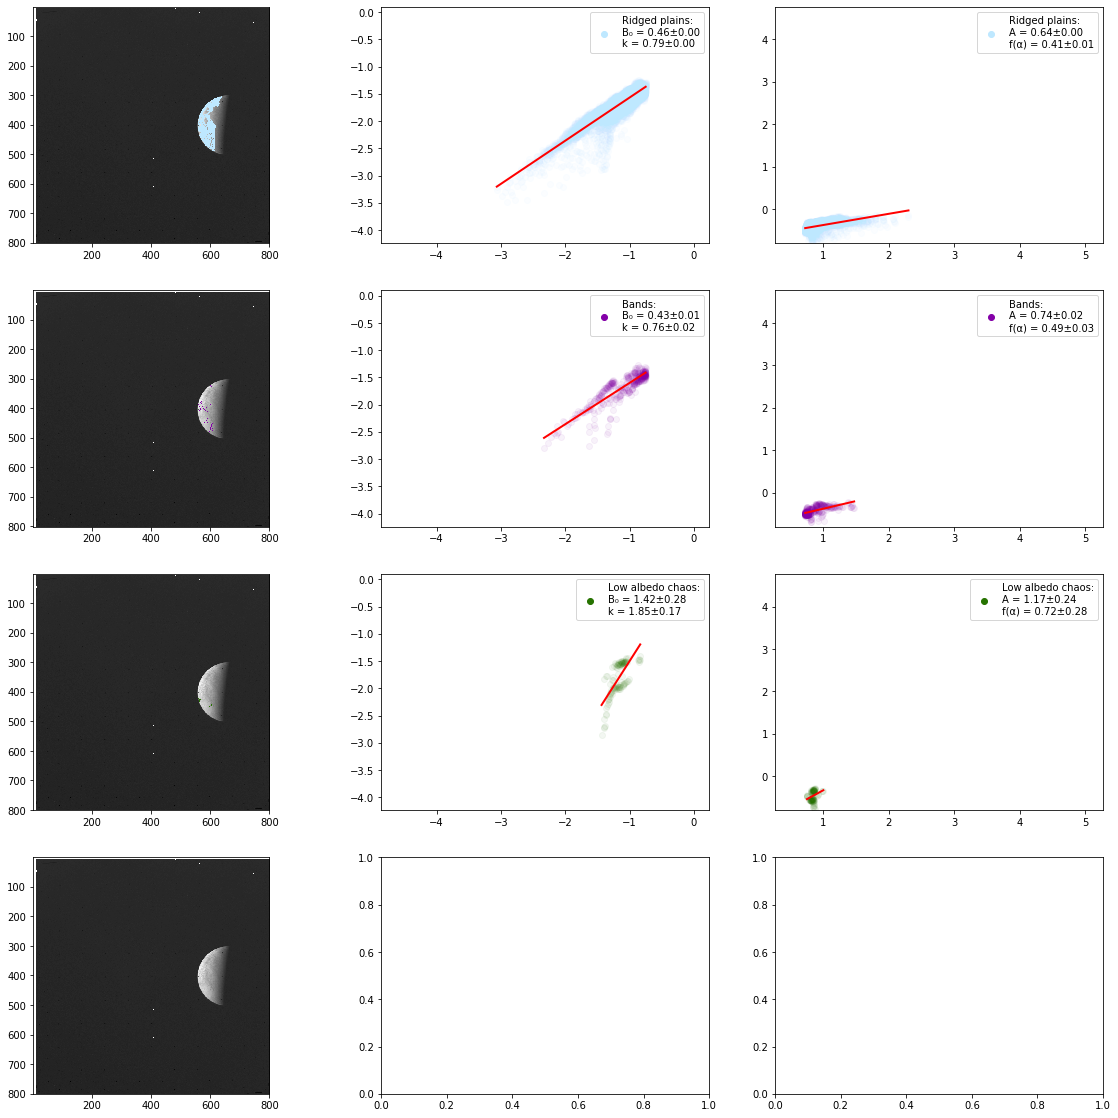

In [142]:
fig, axis = plt.subplots(len(units), 3, figsize=(20, 5 * len(units)))

for i, unit in enumerate(units):
    display_unit(axis[i], img, cond, unit)

axis[0, 0].set_xlabel('Samples')
axis[0, 0].set_ylabel('Line')
axis[0, 0].set_xticks(img.sticks)
axis[0, 0].set_yticks(img.lticks)
axis[0, 0].set_title(img)

axis[0, 1].set_xlabel(r'$\ln(\mu_0 \cdot \mu_1)$')
axis[0, 1].set_ylabel(r'$\ln(I/F \cdot \mu_1)$')
axis[0, 1].set_title(r'Minnaert model: $\frac{I}{F} = B_0 \; \mu_0^k \; \mu_1^{k-1}$')

axis[0, 2].set_xlabel(r'$\frac{1}{\mu_0 + \mu_1}$')
axis[0, 2].set_ylabel(r'$\frac{I/F}{\mu_0} - 1$')
axis[0, 2].set_title(r'Hapke model: $\frac{I}{F} = A \frac{\mu_0}{\mu_0 + \mu_1} * f(\alpha) + (1 - A) \cdot \mu_0$')

#plt.savefig(f'Fits_units-{img}.png', bbox_inches='tight', transparent=True);

In [ ]:
res = get_parameters(img, cond, units)

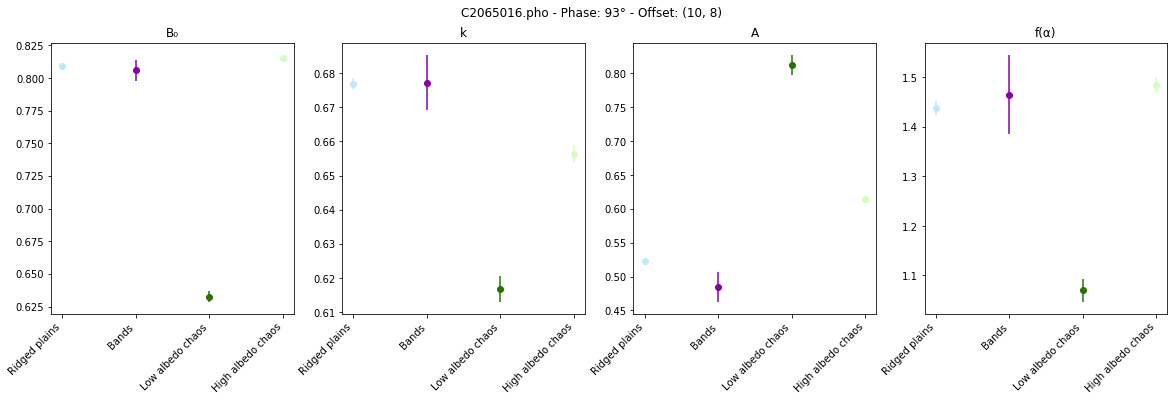

In [143]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, unit in enumerate(res.keys()):
    color = EUROPA.color(unit)
    ax[0].errorbar(i, res[unit]['B0'], yerr=res[unit]['dB0'], fmt='o', color=color)
    ax[1].errorbar(i, res[unit]['k'], yerr=res[unit]['dk'], fmt='o', color=color)
    ax[2].errorbar(i, res[unit]['A'], yerr=res[unit]['dA'], fmt='o', color=color)
    ax[3].errorbar(i, res[unit]['f_alpha'], yerr=res[unit]['df_alpha'], fmt='o', color=color)
    
for i, title in enumerate(['B₀', 'k', 'A', 'f(α)']):
    ax[i].set_title(title)
    ax[i].set_xticks(np.arange(len(res)))
    ax[i].set_xticklabels(res.keys(), rotation=45, ha='right')
    
plt.suptitle(f'{img} - Phase: {np.nanmean(img.phase):.0f}° - Offset: {img.offset}')

plt.savefig(f'Fits_values-{img}.png', bbox_inches='tight', transparent=True);